In [39]:
import tensorflow as tf


imdb = tf.keras.datasets.imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)


# A dictionary mapping words to an integer index
word_index = imdb.get_word_index()

# The first indices are reserved
word_index = {k:(v+3) for k,v in word_index.items()} 
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3





train_data = tf.keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

test_data = tf.keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)

In [40]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
from tensorflow import keras as tff

import numpy as np

print(tf.__version__)


1.12.0


In [41]:
vocab_size = 10000

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, 20))
model.add(tf.keras.layers.GlobalAveragePooling1D())
model.add(tf.keras.layers.Dropout(0.8))
model.add(tf.keras.layers.Dense(20, activation=tf.nn.relu))
model.add(tf.keras.layers.Dropout(0.8))
model.add(tf.keras.layers.Dense(1, activation=tf.nn.sigmoid))

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, None, 20)          200000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 20)                0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 20)                420       
_________________________________________________________________
dropout_20 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 21        
Total params: 200,441
Trainable params: 200,441
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='binary_crossentropy',
              metrics=['acc'])
x_val = train_data[:5000]
partial_x_train = train_data[5000:]

y_val = train_labels[:5000]
partial_y_train = train_labels[5000:]
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Train on 20000 samples, validate on 5000 samples
Epoch 1/40
20000/20000 [==============================] - 1s 74us/step - loss: 0.6935 - acc: 0.5070 - val_loss: 0.6920 - val_acc: 0.6930
Epoch 2/40
20000/20000 [==============================] - 0s 23us/step - loss: 0.6909 - acc: 0.5356 - val_loss: 0.6888 - val_acc: 0.7100
Epoch 3/40
20000/20000 [==============================] - 0s 24us/step - loss: 0.6873 - acc: 0.5515 - val_loss: 0.6818 - val_acc: 0.7460
Epoch 4/40
20000/20000 [==============================] - 0s 24us/step - loss: 0.6777 - acc: 0.5968 - val_loss: 0.6674 - val_acc: 0.7804
Epoch 5/40
20000/20000 [==============================] - 0s 25us/step - loss: 0.6600 - acc: 0.6441 - val_loss: 0.6413 - val_acc: 0.7970
Epoch 6/40
20000/20000 [==============================] - 0s 24us/step - loss: 0.6321 - acc: 0.6801 - val_loss: 0.6033 - val_acc: 0.8140
Epoch 7/40
20000/20000 [==============================] - 0s 24us/step - loss: 0.5991 - acc: 0.7040 - val_loss: 0.5577 - val_acc:

In [43]:
results = model.evaluate(test_data, test_labels)

print(results)
print("Test Accuracy: %0.4f%%"%(results[1]*100))
history_dict = history.history
history_dict.keys()



25000/25000 [==============================] - 2s 72us/step
[0.29367308660030367, 0.88064]
Test Accuracy: 88.0640%


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

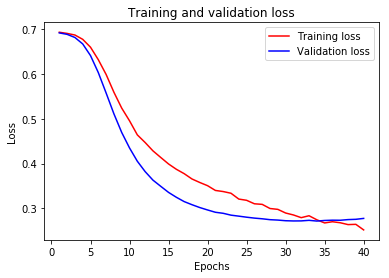

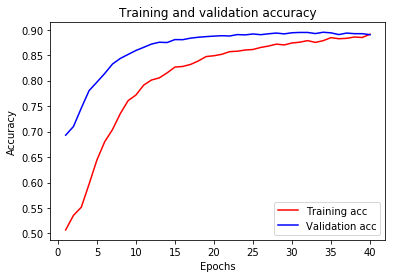

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline
acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.clf()   # clear figure

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [47]:
test_pred = model.predict(test_data).ravel()

In [48]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, test_pred)
from sklearn.metrics import auc
auc = auc(fpr, tpr)

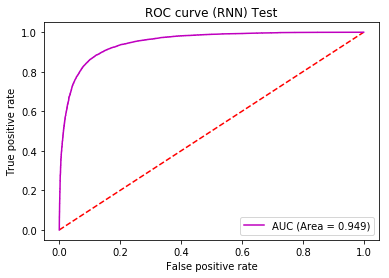

In [49]:
plt.figure()
plt.plot([0, 1], [0, 1], 'r--')
plt.plot(fpr, tpr, 'm', label='AUC (Area = {:.3f})'.format(auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (RNN) Test')
plt.legend(loc='best')
plt.show()



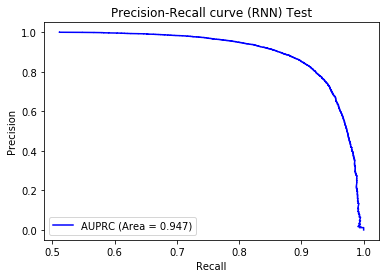

In [50]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
precision, recall, _ = precision_recall_curve(test_labels, test_pred)
auprc = average_precision_score(test_labels, test_pred)
plt.plot(precision, recall, 'b', label='AUPRC (Area = {:.3f})'.format(auprc))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve (RNN) Test')
plt.legend(loc='best')
plt.show()


In [72]:
unit = input("Please Type GRU or LSTM :> ")

model_lstm = tf.keras.Sequential()
model_lstm.add(tf.keras.layers.Embedding(vocab_size, 20))
model_lstm.add(tf.keras.layers.Dropout(0.9))
if unit == 'lstm'.lower():
    #model_lstm.add(tf.keras.layers.CuDNNLSTM(100,return_sequences=True))
    model_lstm.add(tf.keras.layers.CuDNNLSTM(100))
else:
    model_lstm.add(tf.keras.layers.GRU(100))
model_lstm.add(tf.keras.layers.Dropout(0.2))
model_lstm.add(tf.keras.layers.Dense(1, activation=tf.nn.sigmoid))

model_lstm.summary()

Please Type GRU or LSTM :> gru
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_18 (Embedding)     (None, None, 20)          200000    
_________________________________________________________________
dropout_33 (Dropout)         (None, None, 20)          0         
_________________________________________________________________
gru_5 (GRU)                  (None, 100)               36300     
_________________________________________________________________
dropout_34 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 101       
Total params: 236,401
Trainable params: 236,401
Non-trainable params: 0
_________________________________________________________________


In [68]:
model_lstm.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])
x_val = train_data[:5000]
partial_x_train = train_data[5000:]

y_val = train_labels[:5000]
partial_y_train = train_labels[5000:]
history = model_lstm.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Train on 20000 samples, validate on 5000 samples
Epoch 1/40
20000/20000 [==============================] - 20s 976us/step - loss: 0.6932 - acc: 0.5041 - val_loss: 0.6930 - val_acc: 0.5150
Epoch 2/40
20000/20000 [==============================] - 18s 887us/step - loss: 0.6926 - acc: 0.5129 - val_loss: 0.6923 - val_acc: 0.5252
Epoch 3/40
20000/20000 [==============================] - 18s 897us/step - loss: 0.6910 - acc: 0.5201 - val_loss: 0.6869 - val_acc: 0.5548
Epoch 4/40
20000/20000 [==============================] - 18s 878us/step - loss: 0.7014 - acc: 0.5223 - val_loss: 0.6925 - val_acc: 0.5060
Epoch 5/40
20000/20000 [==============================] - 18s 877us/step - loss: 0.6888 - acc: 0.5306 - val_loss: 0.6890 - val_acc: 0.5238
Epoch 6/40
20000/20000 [==============================] - 18s 878us/step - loss: 0.6860 - acc: 0.5399 - val_loss: 0.6862 - val_acc: 0.5406
Epoch 7/40
20000/20000 [==============================] - 17s 869us/step - loss: 0.6826 - acc: 0.5411 - val_loss: 0.6

25000/25000 [==============================] - 91s 4ms/step
[0.5969071181297302, 0.67228]
Test Accuracy: 67.2280%


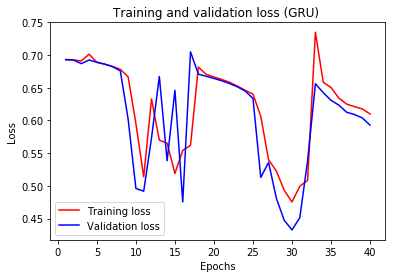

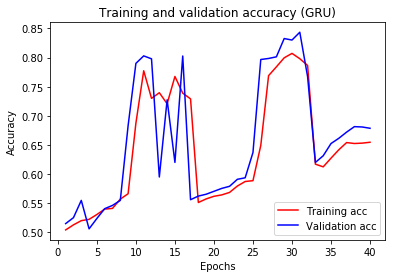

In [69]:
results = model_lstm.evaluate(test_data, test_labels)

print(results)
print("Test Accuracy: %0.4f%%"%(results[1]*100))
history_dict = history.history
history_dict.keys()
acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss (%s) '%unit.upper())
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.clf()   # clear figure

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy (%s)'%unit.upper())
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

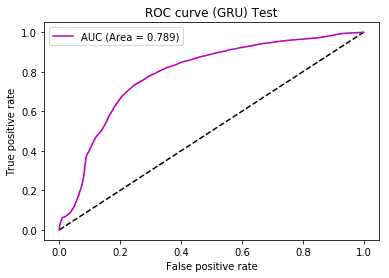

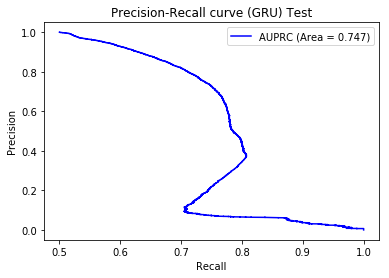

In [70]:
test_pred = model_lstm.predict(test_data).ravel()
fpr, tpr, thresholds = roc_curve(test_labels, test_pred)
from sklearn.metrics import auc
auc = auc(fpr, tpr)
plt.figure()
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, 'm', label='AUC (Area = {:.3f})'.format(auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (%s) Test'%unit.upper())
plt.legend(loc='best')
plt.show()

precision, recall, _ = precision_recall_curve(test_labels, test_pred)
auprc = average_precision_score(test_labels, test_pred)
plt.plot(precision, recall, 'b', label='AUPRC (Area = {:.3f})'.format(auprc))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve (%s) Test'%unit.upper())
plt.legend(loc='best')
plt.show()


In [252]:
'lsTM'.lower()

'lstm'